In [1]:
from fastai.tabular import *

In [2]:
path = 'C:/Users/Jorge Mejia/Desktop/analisis_de_las_variables_de_la_esquizotipia_con_deep_learning/analisis_con_dataset_final/'
path

'C:/Users/Jorge Mejia/Desktop/analisis_de_las_variables_de_la_esquizotipia_con_deep_learning/analisis_con_dataset_final/'

In [3]:
df = pd.read_csv(path + 'dataset_esquizotipia_final.csv')
df.head()

CSI_RESPROBL  CSI_REESTCOGN  CSI_APOYOSOC  CSI_EVITPROBL  CSI_PENSDESID  \
0            17              5             0              7              5   
1            13             11             3              6             11   
2            20             20            20             11              8   
3            12              1             0              4              6   
4             8              9            17              4             14   

   CSI_RETISOC  CSI_AUTOCRIT  ANSIEDADRASGO  SCL90_IDEA_PARAN  \
0           13             2             20                 0   
1           17            11             17                 1   
2            3             0             20                 1   
3            3             1             18                 0   
4            2             6             27                17   

   CAPE_POSIT_FREC  TRAUMA_FRECUENCIA  SPQ_TOTAL_ESQUIZOT  
0               24                  4                   0  
1               22                  9                   0  
2               30                 12                   1  
3               20                  4                   0  
4               35                 17                   2

In [4]:
procs = [FillMissing, Categorify, Normalize]

In [5]:
# se selecciona un 95% de los datos para entrenamiento y un 5% de los datos para validación
valid_idx  =  range ( len ( df ) - 14 ,  len ( df ))

In [6]:
# Se define la variable dependiente
dep_var  =  'SPQ_TOTAL_ESQUIZOT'

In [7]:
data = TabularDataBunch.from_df(path, df, dep_var, valid_idx=valid_idx, procs=procs)
print(data.train_ds.cont_names) # `cont_names` defaults to: set(df)-set(cat_names)-{dep_var}

['CSI_RESPROBL', 'SCL90_IDEA_PARAN', 'CSI_EVITPROBL', 'CSI_PENSDESID', 'CAPE_POSIT_FREC', 'CSI_REESTCOGN', 'CSI_APOYOSOC', 'CSI_AUTOCRIT', 'TRAUMA_FRECUENCIA', 'ANSIEDADRASGO', 'CSI_RETISOC']


In [8]:
(cat_x,cont_x),y = next(iter(data.train_dl))
for o in (cat_x, cont_x, y): print(to_np(o[:5]))

[0 0 0 0 0]
[[-1.259873 -0.31388  -1.448245  1.155445 ... -0.012412 -0.814424  0.204195 -1.262255]
 [-1.854125  1.245486  0.773541 -0.351497 ... -0.012412 -1.277669  0.357623 -0.202584]
 [-1.259873 -0.118959  0.995719  1.322883 ...  2.297479  0.112064 -0.102661  1.280955]
 [-0.863705  0.270882  1.217898 -1.021249 ... -0.545463  1.779744 -1.636943  1.492889]
 [-2.448378 -0.898642 -0.781709 -1.523563 ... -0.900831 -0.907073 -0.409518 -1.050321]]
[0 0 0 0 0]


In [9]:
learn = tabular_learner(data, layers=[100,50], metrics=accuracy)
learn.fit(10)

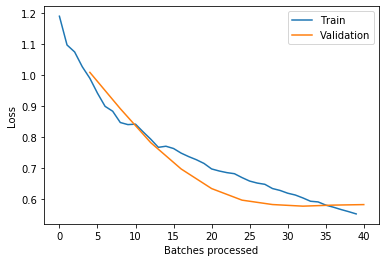

In [10]:
learn.recorder.plot_losses()
learn.show_results()

In [11]:
# el numero en el nombre es el porcentaje de precision, en este caso el porcentaje es 0.785714
learn.save("trained_8vo_model_epoch10_785714", return_path=True)

WindowsPath('C:/Users/Jorge Mejia/Desktop/analisis_de_las_variables_de_la_esquizotipia_con_deep_learning/analisis_con_dataset_final/models/trained_8vo_model_epoch10_785714.pth')